In [26]:
#Importar librerias relevantes para el EDA y ETL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
%matplotlib inline

##pd.set_option('display.max_rows', )
##pd.set_option('display.max_columns', None)
##pd.set_option('display.width', None)
##pd.set_option('display.max_colwidth', None)

In [27]:
# Lectura de los dataset tipo CSV con la librería Pandas .read_csv()

df_calendar = pd.read_csv('data/calendar.csv', sep = ',', index_col= 'listing_id')
df_listings = pd.read_csv('data/listings.csv', sep = ',', index_col= 'id', low_memory=False)
df_reviews = pd.read_csv('data/reviews.csv', sep = ',', index_col= 'listing_id')

## Dataframe Listings

In [ ]:

# Observamos el tamaño del dataset Listing
df_listings.shape

# Se puede observar que el tamaño del dataset contiene 105 columnas, de las cuales habrá que realizar
# ánalis exploratorio para eliminar o completar datos vacíos

In [ ]:
## El primer paso es observa la cantida de vacios por columna

##df_listings.isna().sum().sort_values(ascending = False)

df_listings.isna().sum().sort_values(ascending= False)/len(df_listings) * 100


In [28]:
drop_colums = [
    'listing_url', 'scrape_id', 'last_scraped', 'space', 'summary', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules',
    'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_total_listings_count', 'host_verifications',
    'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'square_feet', 'weekly_price', 'monthly_price',
    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
    'calendar_last_scraped', 'number_of_reviews_ltm', 'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'is_business_travel_ready',
    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'host_location', 'host_neighbourhood', 'maximum_nights', 'minimum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'security_deposit', 'host_response_time', 'host_response_rate', 'cleaning_fee', 'host_acceptance_rate',
    'host_is_superhost', 'host_name', 'host_identity_verified', 'host_since', 'host_has_profile_pic', 'require_guest_phone_verification','require_guest_profile_picture', 
    'availability_30', 'availability_60', 'availability_90', 'availability_365'
]

df_listings.drop(columns=drop_colums, inplace=True)

In [29]:

df_listings['price'] = df_listings['price'].str.replace('[\\$,]', '', regex=True).astype(float)
df_listings['extra_people'] = df_listings['extra_people'].str.replace('[\\$,]', '', regex=True).astype(float)

In [30]:
df_cat = df_listings.copy()

In [31]:
df_cat.drop(columns = ['amenities', 'name', 'description', 'city'], inplace = True)

In [32]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

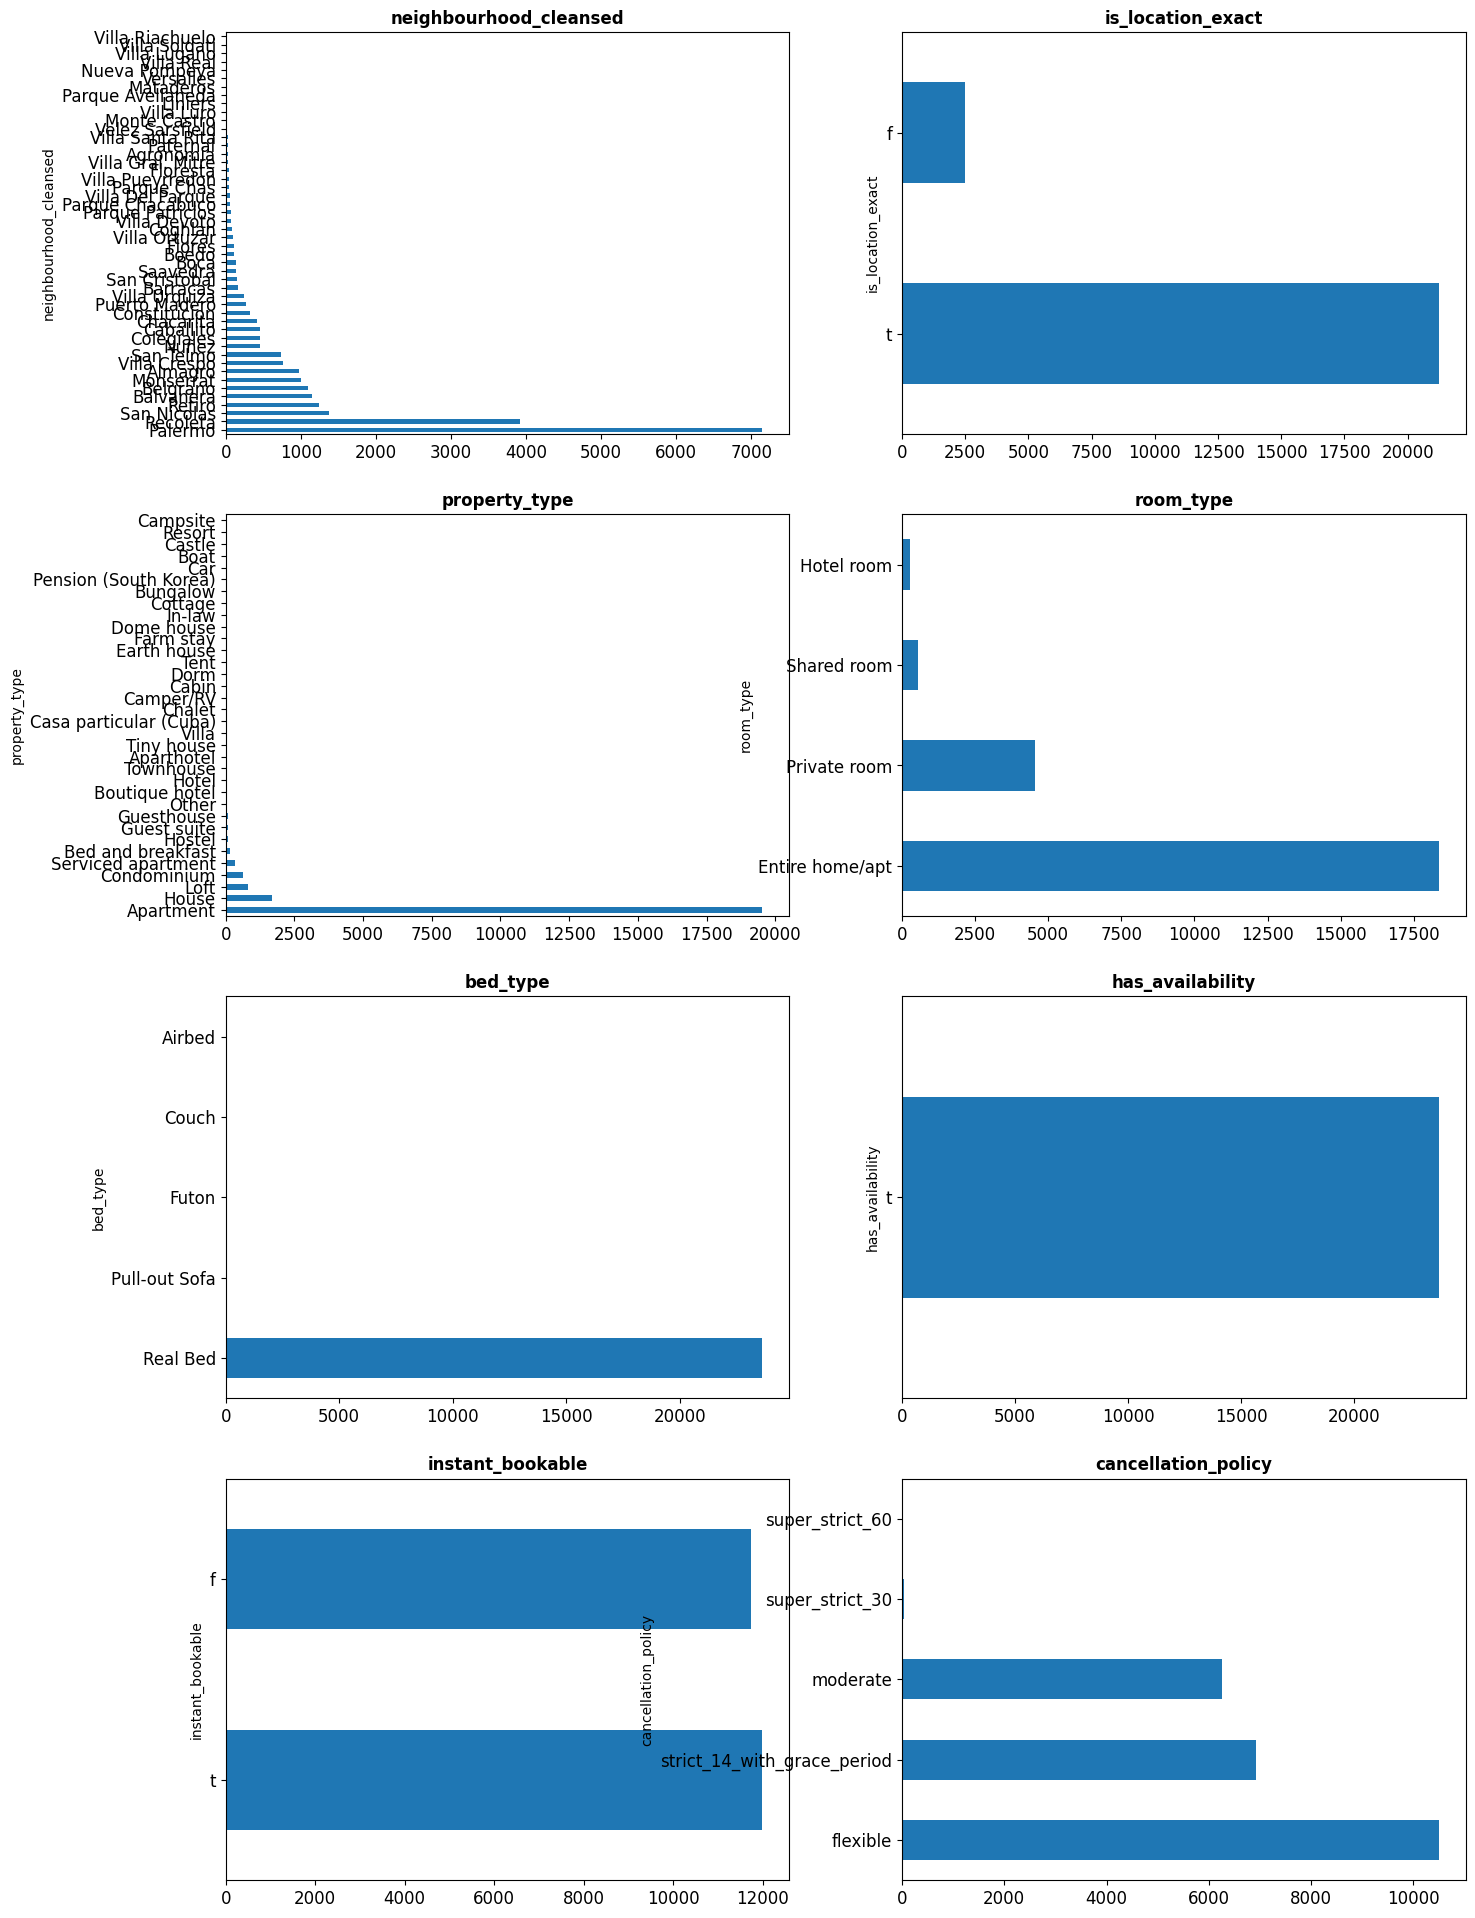

In [33]:
graficos_eda_categoricos(df_cat.select_dtypes('O'))

Conclusiones:

* has_availabity solo tiene un valor --> Se elimina
* bed_type solo tiene un valor --> Se elimina

In [ ]:
df_cat.select_dtypes('O')

In [ ]:
df_listings.select_dtypes('number')

In [35]:

df_cat.select_dtypes('O').isna().sum().sort_values(ascending= False)/len(df_listings) * 100

neighbourhood_cleansed    0.0
is_location_exact         0.0
property_type             0.0
room_type                 0.0
bed_type                  0.0
has_availability          0.0
instant_bookable          0.0
cancellation_policy       0.0
dtype: float64

In [36]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [37]:
estadisticos_cont(df_listings.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
host_id,23729.0,1.052637e+08,6.886052e+07,9.990251e+07,2616.00000,1.546679e+07,6.886052e+07,1.841516e+08,3.445900e+08
host_listings_count,23726.0,9.765869e+00,1.000000e+00,7.004439e+01,0.00000,1.000000e+00,1.000000e+00,4.000000e+00,1.511000e+03
latitude,23729.0,-3.459258e+01,-3.459189e+01,1.828243e-02,-34.68895,-3.460343e+01,-3.459189e+01,-3.458215e+01,-3.453410e+01
longitude,23729.0,-5.841590e+01,-5.841516e+01,2.992549e-02,-58.53020,-5.843538e+01,-5.841516e+01,-5.839175e+01,-5.835541e+01
accommodates,23729.0,2.761768e+00,2.000000e+00,1.480604e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,23667.0,1.259243e+00,1.000000e+00,6.316287e-01,0.00000,1.000000e+00,1.000000e+00,1.500000e+00,3.000000e+01
bedrooms,23686.0,1.135988e+00,1.000000e+00,8.590067e-01,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+01
beds,23562.0,1.863085e+00,1.000000e+00,1.486757e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
price,23729.0,4.014876e+03,2.124000e+03,1.607533e+04,0.00000,1.394000e+03,2.124000e+03,3.319000e+03,6.637320e+05
guests_included,23729.0,1.377934e+00,1.000000e+00,9.470268e-01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.600000e+01
